#Problem Statement:
Decreasing the Customer Churn is a key goal for any business. Predicting Customer Churn (also known as Customer Attrition) represents an additional potential revenue source for any business. Customer Churn impacts the cost to the business. Higher Customer Churn leads to loss in revenue and the additional marketing costs involved with replacing those customers with new ones. 

In this challenge, as a data scientist of a bank, you are asked to analyze the past data and predict whether the customer will churn or not in the next 6 months. This would help the bank to have the right engagement with customers at the right time.


#Objective:
Our objective is to build a machine learning model to predict whether the customer will churn or not in the next six months.




#DataSets:
3 files - train.csv, test.csv and sample_submission.csv

#Evoluation metric

The evaluation metric for this hackathon is Macro f1 score.


# 1) Importing important liberaries:

In [165]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data
!pip install -q --upgrade pandas-profiling

In [166]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [167]:
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


#2) Uploading Files

In [168]:
from google.colab import files
uploaded = files.upload()

Saving sample_OoSmYo5.csv to sample_OoSmYo5 (3).csv
Saving test_lTY72QC.csv to test_lTY72QC (3).csv
Saving train_PDjVQMB.csv to train_PDjVQMB (3).csv


#3) Data Acquisition and description:

In [169]:
import io
train_df = pd.read_csv(io.BytesIO(uploaded['train_PDjVQMB.csv']))
print(train_df.head())

         ID  Age  Gender         Income       Balance  Vintage  \
0  84e2fcc9   36  Female       5L - 10L  563266.44000        4   
1  57fea15e   53  Female   Less than 5L  875572.11000        2   
2  8df34ef3   35  Female  More than 15L  701607.06000        2   
3  c5c0788b   43  Female  More than 15L 1393922.16000        0   
4  951d69c4   39  Female  More than 15L  893146.23000        1   

   Transaction_Status Product_Holdings  Credit_Card Credit_Category  Is_Churn  
0                   0                1            0         Average         1  
1                   1                1            1            Poor         0  
2                   1                2            0            Poor         0  
3                   1                2            1            Poor         1  
4                   1                1            1            Good         1  


In [170]:
test_df = pd.read_csv(io.BytesIO(uploaded['test_lTY72QC.csv']))
print(test_df.head())

         ID  Age  Gender         Income       Balance  Vintage  \
0  55480787   50  Female  More than 15L 1008636.39000        2   
1  9aededf2   36    Male       5L - 10L  341460.72000        2   
2  a5034a09   25  Female      10L - 15L  439460.10000        0   
3  b3256702   41    Male   Less than 5L   28581.93000        0   
4  dc28adb5   48    Male  More than 15L 1104540.03000        2   

   Transaction_Status Product_Holdings  Credit_Card Credit_Category  
0                   1                2            1         Average  
1                   0                2            1         Average  
2                   0                2            1            Good  
3                   1                2            1            Poor  
4                   1               3+            0            Good  


In [171]:
sample_df = pd.read_csv(io.BytesIO(uploaded['sample_OoSmYo5.csv']))
print(sample_df.head())

         ID  Is_Churn
0  55480787         1
1  9aededf2         1
2  a5034a09         1
3  b3256702         1
4  dc28adb5         1


#4) Checking info and description:

In [172]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [173]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2851 non-null   object 
 1   Age                 2851 non-null   int64  
 2   Gender              2851 non-null   object 
 3   Income              2851 non-null   object 
 4   Balance             2851 non-null   float64
 5   Vintage             2851 non-null   int64  
 6   Transaction_Status  2851 non-null   int64  
 7   Product_Holdings    2851 non-null   object 
 8   Credit_Card         2851 non-null   int64  
 9   Credit_Category     2851 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 222.9+ KB


In [174]:
train_df.describe()

Age       Balance    Vintage  Transaction_Status  Credit_Card  \
count 6650.00000    6650.00000 6650.00000          6650.00000   6650.00000   
mean    41.13023  804595.35498    2.25023             0.51579      0.66436   
std      9.68575  515754.86731    1.45880             0.49979      0.47225   
min     21.00000      63.00000    0.00000             0.00000      0.00000   
25%     34.00000  392264.21250    1.00000             0.00000      0.00000   
50%     40.00000  764938.57500    2.00000             1.00000      1.00000   
75%     47.00000 1147123.71000    3.00000             1.00000      1.00000   
max     72.00000 2436615.81000    5.00000             1.00000      1.00000   

        Is_Churn  
count 6650.00000  
mean     0.23113  
std      0.42159  
min      0.00000  
25%      0.00000  
50%      0.00000  
75%      0.00000  
max      1.00000

In [175]:
train_df.shape

(6650, 11)

In [176]:
test_df.shape

(2851, 10)

In [177]:
sample_df.shape

(2851, 2)

# 5) Data Preprofiling:

## 5.1) Data Preprofiling of Train Dataset:

In [178]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [179]:
from pandas_profiling import ProfileReport

In [180]:
profile = ProfileReport(train_df)
profile.to_file(output_file='Pre_Profiling_Report.html')
print('Accomplished!')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


## 5.2) Data Preprofiling of Test Dataset:

In [181]:
profile = ProfileReport(test_df)
profile.to_file(output_file='Pre_Profiling_Report_testdataset.html')
print('Accomplished!')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [182]:
train_df.skew()

Age                   0.55517
Balance               0.46446
Vintage               0.02142
Transaction_Status   -0.06320
Credit_Card          -0.69629
Is_Churn              1.27591
dtype: float64

# 6) EDA

## 6.1) Heat map for finding corelation between features:

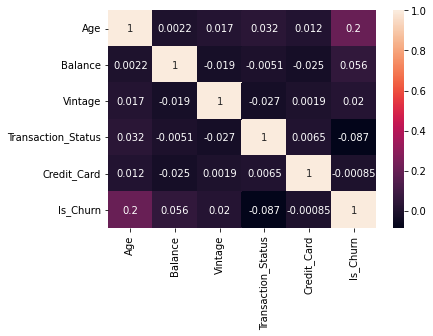

In [183]:
sns.heatmap(train_df.corr(), annot=True)

## 6.2) Pair plot

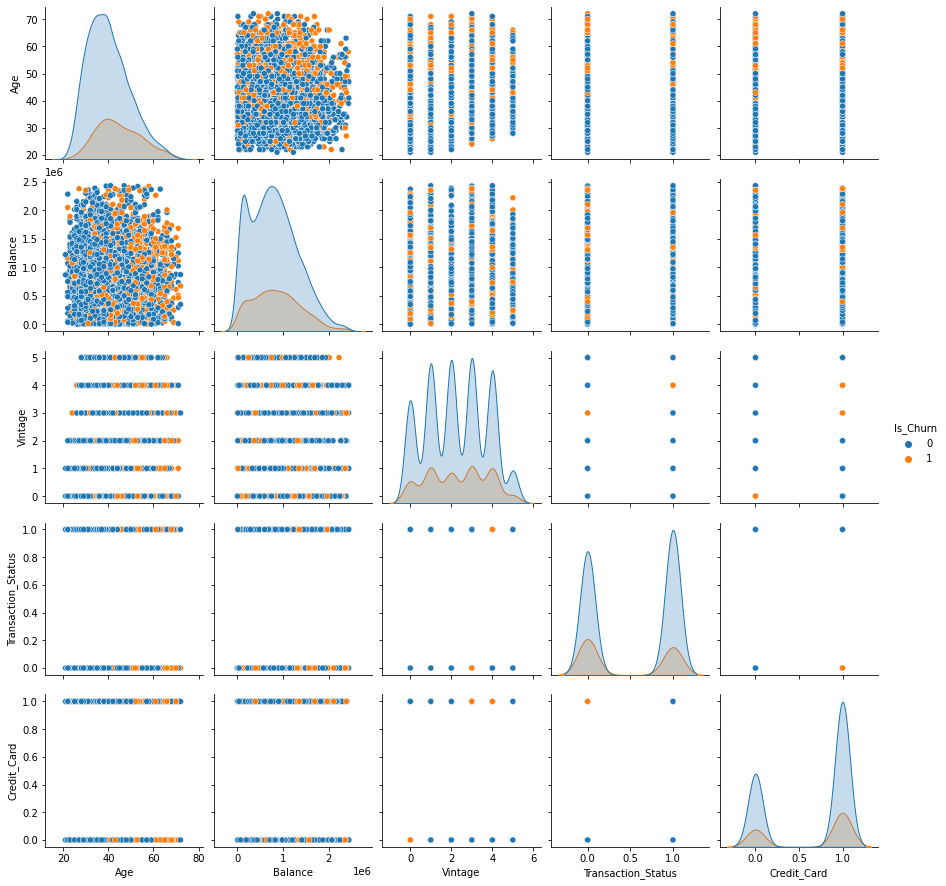

In [184]:
sns.pairplot(train_df,hue="Is_Churn")

## 6.3) Count of Churned customers 

Text(0, 0.5, 'Is_Churn')

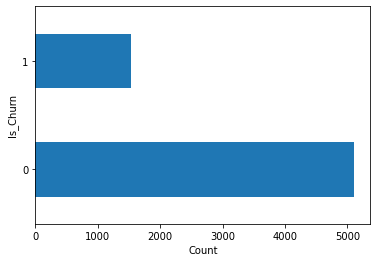

In [185]:
train_df["Is_Churn"].value_counts().plot.barh()
plt.xlabel('Count')
plt.ylabel('Is_Churn')

#Observations on Train dataset:
1) No missing data in train and test dataframe.

2)dtypes: float64(1), int64(5), object(5) in Train dataset

3)Male	3612 
Female	3038 

4)Little possitive corelatIon between age ans is_churn and Little negative corelatIon between Transaction_Status and age

5) Credit category:Poor	3076 ,Average	2043 ,Good	1531 

6)Age:Minimum	21
Maximum	72

7) ID has a high cardinality: 6650 distinct values	High cardinality
ID is uniformly distributed	Uniform
ID has unique values	Unique
Vintage has 956 (14.4%) zeros

8)is_churn is little bit positive skewed

9) Id column is highly cardinal so need to remove during model training

10) No major problem seen in dataset

11) No duplicates

12) No nullvalues



# 7) Preprocessing of Train data:

#Conversion of some int column into object:

In [186]:
train_df["Vintage"]=train_df["Vintage"].astype('object')
train_df["Transaction_Status"]=train_df["Transaction_Status"].astype('object')
train_df["Credit_Card"]=train_df["Credit_Card"].astype('object')

In [187]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   object 
 6   Transaction_Status  6650 non-null   object 
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   object 
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 571.6+ KB


#Dropping columns (ID) of Train dataset:

In [188]:
train_df_con=train_df.drop(["ID"],axis=1)

In [189]:
train_df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 6650 non-null   int64  
 1   Gender              6650 non-null   object 
 2   Income              6650 non-null   object 
 3   Balance             6650 non-null   float64
 4   Vintage             6650 non-null   object 
 5   Transaction_Status  6650 non-null   object 
 6   Product_Holdings    6650 non-null   object 
 7   Credit_Card         6650 non-null   object 
 8   Credit_Category     6650 non-null   object 
 9   Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 519.7+ KB


#Seperation of numerical and categorical column of Train Dataset:

In [190]:
numeric_cols = ['Age','Balance']
cat_cols = list(set(train_df_con.columns) - set(numeric_cols)-{'Is_Churn'})
cat_cols.sort()
print(numeric_cols)
print(cat_cols)

['Age', 'Balance']
['Credit_Card', 'Credit_Category', 'Gender', 'Income', 'Product_Holdings', 'Transaction_Status', 'Vintage']


#Dummification of categorical columns of Train Dataset:

In [191]:
train_df_dummy = pd.get_dummies(train_df_con,columns=['Credit_Card', 'Credit_Category', 'Gender', 'Income', 'Product_Holdings', 'Transaction_Status', 'Vintage'], drop_first=True)

train_df_dummy.head(5)

Age       Balance  Is_Churn  Credit_Card_1  Credit_Category_Good  \
0   36  563266.44000         1              0                     0   
1   53  875572.11000         0              1                     0   
2   35  701607.06000         0              0                     0   
3   43 1393922.16000         1              1                     0   
4   39  893146.23000         1              1                     1   

   Credit_Category_Poor  Gender_Male  Income_5L - 10L  Income_Less than 5L  \
0                     0            0                1                    0   
1                     1            0                0                    1   
2                     1            0                0                    0   
3                     1            0                0                    0   
4                     0            0                0                    0   

   Income_More than 15L  Product_Holdings_2  Product_Holdings_3+  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     1                   1                    0   
3                     1                   1                    0   
4                     1                   0                    0   

   Transaction_Status_1  Vintage_1  Vintage_2  Vintage_3  Vintage_4  Vintage_5  
0                     0          0          0          0          1          0  
1                     1          0          1          0          0          0  
2                     1          0          1          0          0          0  
3                     1          0          0          0          0          0  
4                     1          1          0          0          0          0

#Splitting of X_train and y_train:

In [192]:
X_train=train_df_dummy.drop('Is_Churn',axis = 1)
y_train =train_df_dummy['Is_Churn']

In [193]:
X_train.shape

(6650, 17)

In [194]:
y_train.shape

(6650,)

# 8) Preprocessing of test data:

#Conversion of some int column into object(Test Data):

In [195]:
test_df["Vintage"]=test_df["Vintage"].astype('object')
test_df["Transaction_Status"]=test_df["Transaction_Status"].astype('object')
test_df["Credit_Card"]=test_df["Credit_Card"].astype('object')

In [196]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2851 non-null   object 
 1   Age                 2851 non-null   int64  
 2   Gender              2851 non-null   object 
 3   Income              2851 non-null   object 
 4   Balance             2851 non-null   float64
 5   Vintage             2851 non-null   object 
 6   Transaction_Status  2851 non-null   object 
 7   Product_Holdings    2851 non-null   object 
 8   Credit_Card         2851 non-null   object 
 9   Credit_Category     2851 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 222.9+ KB


#Seperation of numerical and categorical column of Test Dataset:

In [197]:
numeric_cols = ['Age','Balance']
cat_cols = list(set(test_df.columns) - set(numeric_cols)-{"ID"})
cat_cols.sort()
print(numeric_cols)
print(cat_cols)

['Age', 'Balance']
['Credit_Card', 'Credit_Category', 'Gender', 'Income', 'Product_Holdings', 'Transaction_Status', 'Vintage']


#Dummification of categorical columns of Test Dataset:

In [198]:
test_df_dummy = pd.get_dummies(test_df,columns=['Credit_Card', 'Credit_Category', 'Gender', 'Income', 'Product_Holdings', 'Transaction_Status', 'Vintage'], drop_first=True)

test_df_dummy.head(5)

ID  Age       Balance  Credit_Card_1  Credit_Category_Good  \
0  55480787   50 1008636.39000              1                     0   
1  9aededf2   36  341460.72000              1                     0   
2  a5034a09   25  439460.10000              1                     1   
3  b3256702   41   28581.93000              1                     0   
4  dc28adb5   48 1104540.03000              0                     1   

   Credit_Category_Poor  Gender_Male  Income_5L - 10L  Income_Less than 5L  \
0                     0            0                0                    0   
1                     0            1                1                    0   
2                     0            0                0                    0   
3                     1            1                0                    1   
4                     0            1                0                    0   

   Income_More than 15L  Product_Holdings_2  Product_Holdings_3+  \
0                     1                   1                    0   
1                     0                   1                    0   
2                     0                   1                    0   
3                     0                   1                    0   
4                     1                   0                    1   

   Transaction_Status_1  Vintage_1  Vintage_2  Vintage_3  Vintage_4  Vintage_5  
0                     1          0          1          0          0          0  
1                     0          0          1          0          0          0  
2                     0          0          0          0          0          0  
3                     1          0          0          0          0          0  
4                     1          0          1          0          0          0

#Splitting of X_test:

In [199]:
X_test=test_df_dummy.drop('ID',axis = 1)

In [200]:
X_test.shape

(2851, 17)

# 9) Standard Scaling:

In [201]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform (X_test)


#SMOTE:

In [202]:
from imblearn.over_sampling import SMOTE

In [203]:
from typing import Counter
counter=Counter(y_train)
#Oversampling the train dataset with SMOTE
smt=SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(X_train,y_train)
counter=Counter(y_train_sm)
print('After',counter)

After Counter({1: 5113, 0: 5113})


#XGB with SMOTE

In [204]:
from xgboost import XGBClassifier
#xgb_model = XGBClassifier(n_estimators=64, random_state=42,max_depth=4,min_child_weight=13,gamma=0.0,colsample_bytree=0.9)

#Parameter tuning

In [205]:
from sklearn.model_selection import KFold                           # To create k folds for cross validation
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores
from sklearn.model_selection import GridSearchCV                    # To tune the models
from sklearn.model_selection import RandomizedSearchCV

In [206]:

# Creating a parameter grid for XGB only
param_grid = {'max_depth':range(3,10,2),
                  'min_child_weight':range(1,6,2),
                  'n_estimators':[60,62,64,66,68,70],
                  'colsample_bytree':[0.7,0.8,0.9]
                  }
model = XGBClassifier(random_state=42,gamma=0.0)
tree_cv=RandomizedSearchCV(model,param_grid,cv=5)
tree_cv.fit(X_train_sm, y_train_sm)
print("Tuned XGB paramters: {}".format(tree_cv.best_params_))
print("Tuned XGB best score: {}".format(tree_cv.best_score_))
print("Tuned XGB best estimators: {}".format(tree_cv.best_estimator_))



Tuned XGB paramters: {'n_estimators': 66, 'min_child_weight': 3, 'max_depth': 9, 'colsample_bytree': 0.7}
Tuned XGB best score: 0.8162785995454186
Tuned XGB best estimators: XGBClassifier(colsample_bytree=0.7, gamma=0.0, max_depth=9, min_child_weight=3,
              n_estimators=66, random_state=42)


In [207]:
# Using the best model
xgb_best_model=XGBClassifier(colsample_bytree=0.7, gamma=0.0, max_depth=9, min_child_weight=3,
              n_estimators=68, random_state=42)
xgb_best_model.fit(X_train_sm, y_train_sm)
Is_Churn = xgb_best_model.predict(X_test)

In [208]:
len(Is_Churn)

2851

In [209]:
test_df['Is_Churn'] = Is_Churn

In [210]:
test_df.head(5)

ID  Age  Gender         Income       Balance Vintage  \
0  55480787   50  Female  More than 15L 1008636.39000       2   
1  9aededf2   36    Male       5L - 10L  341460.72000       2   
2  a5034a09   25  Female      10L - 15L  439460.10000       0   
3  b3256702   41    Male   Less than 5L   28581.93000       0   
4  dc28adb5   48    Male  More than 15L 1104540.03000       2   

  Transaction_Status Product_Holdings Credit_Card Credit_Category  Is_Churn  
0                  1                2           1         Average         0  
1                  0                2           1         Average         0  
2                  0                2           1            Good         0  
3                  1                2           1            Poor         0  
4                  1               3+           0            Good         0

#Creating sample_submission.csv

In [211]:
sample_submission=test_df.filter(['ID','Is_Churn'], axis=1)

In [212]:
sample_submission.to_csv('SMOTE_xgb.csv',index = False)